In [10]:
from tqdm.notebook import tqdm

with open('task2/train/tags.txt', 'r') as f:
    tags = f.read().split()

In [11]:
from string import punctuation

with open('task2/train/sentences.txt', 'r') as f:
    sentences = f.read()
    words = sentences.split()

# BIO binary encoding

In [26]:
def create_bio_binary(words, tags, file, max_length):
    assert len(words) == len(tags)
    full_words = []
    full_tags = []
    full_lengths = []
    for word, tag in zip(words, tags):
        if word.startswith('##'):
            full_words[-1] += word[2:]
            full_lengths[-1] += 1
        else:
            full_words.append(word)
            full_lengths.append(1)
            #full_tags.append(tag)
            if tag == 'O':
                full_tags.append(tag)
            else:
                full_tags.append(tag[:2]+'KEY')
    
    with open(file, 'w') as f:
        cur_length = 0
        for word, tag, length in zip(full_words, full_tags, full_lengths):
            if cur_length + length + 2 > max_length:
                f.write('\n')
                cur_length = 0
            cur_length += length
            f.write(word + '\t' + tag + '\n')

In [32]:
for part in ('train', 'val', 'test'):
    with open('task2/{}/tags.txt'.format(part), 'r') as f:
        tags = f.read().split()
    with open('task2/{}/sentences.txt'.format(part), 'r') as f:
        sentences = f.read()
        words = sentences.split()
    create_bio_binary(words, tags, 'task1/{}_bio.tsv'.format(part), 64)

# Length distribution

In [3]:
prev = 'O'
length = 0
length_ents = {'Process': [], 'Task': [], 'Material': []}
for tag in tqdm(tags):
    if tag.startswith('B'):
        if length != 0:
            length_ents[entity].append(length)
        length = 1
        entity = tag[2:]
    elif tag.startswith('I'):
        length += 1
    else:
        if length != 0:
            length_ents[entity].append(length)
        length = 0

/home/aschern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
/home/aschern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/aschern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


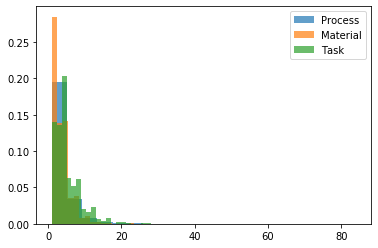

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(length_ents['Process'], bins=20, normed=1, label='Process', alpha=0.7)
plt.hist(length_ents['Material'], bins=20, normed=1, label='Material', alpha=0.7)
plt.hist(length_ents['Task'], bins=20, normed=1, label='Task', alpha=0.7)
plt.legend()
plt.show()

In [11]:
import numpy as np

np.mean(length_ents['Task']), np.median(length_ents['Task'])

(5.299011532125206, 4.0)

In [12]:
np.mean(length_ents['Process']), np.median(length_ents['Process'])

(4.0595160235448, 3.0)

In [13]:
np.mean(length_ents['Material']), np.median(length_ents['Material'])

(3.4656303972366147, 3.0)

# Punctuation

In [14]:
for i in range(len(tags) - 1):
    if tags[i][0] != 'O' and tags[i + 1][0] == 'O':
        if words[i] in punctuation or words[i + 1] in punctuation:
            print(words[i], words[i + 1])

##vin (
limit [
. past
, [
cooling [
methods [
liquids [
correlations [
. semic
, justify
, celebr
##60 [
pulses [
model [
. 2
, etc
. course
. in
. test
transition (
function (
, reproduce
. simplicity
spin [
systems [
form (
form (
field [
, expect
, so
##on [
. ‘
force [
##on [
water [
, however
, pic
, ke
, components
spectroscopy (
spectroscopy (
water [
. studies
. however
, i
. furthermore
ionization [
model [
, 8
, respectively
##ene [
fragmentation [
microscopy (
defects [
reconstruction [
defect [
precursors [
##wall [
##ene [
. here
. intuitively
. formally
. fs
. here
, e
##ass (
configuration (
) [
reaction [
method [
atoms [
. polar
diodes [
##sensing [
##ing [
. cross
analysis [
hamiltonian [
. barrier
. (
, refs
. elucid
, pes
, tt
surfaces (
##ophores [
##dynamic (
procedures [
minima (
energy (
, enanti
, categories
catalysts [
complexes [
, development
, later
. t
chains (
film (
chain (
calculations [
chains (
##bs [
##bs (
mechanism (
. then
. that
. (
. diminish
.

method [
. frameworks
. fact
, well
. scenario
levels [
regime [
series [
. idea
. fact
, pseudo
. π
sm (
′ (
[UNK] (
. finally
. k
. however
##0 (
supersymmetry (
##bc [
##ad [
##et [
##ad [
. therefore
resonances (
settings (
. [
equation [
equation [
large [
symmetry [
interaction (
. γ
amounts (
. indeed
dimensions [
tension [
tension [
brane [
, mev
barriers (
##s (
interaction [
. later
##3 [
metal (
, time
effect [
fermions [
effect [
effect [
##ers (
molecules (
, boh
trees (
graphs (
. reason
, g
. field
wave (
. short
wave (
. flow
; relaxation
. a
, weiss
, gan
devices [
. den
. this
particles (
, (
, time
, [
tests [
gel (
clot [
clot [
, g
waveforms [
, g
analysis [
processes [
waveform (
##ator [
viscosity (
, >
fluids [
. moreover
, “
. energy
. respect
time (
; (
content (
iron (
. setting
equations (
operators (
algorithm (
, (
; slow
methods (
. form
employed [
. furthermore
sw [
, phase
phases (
, (
. consequently
. recently
##ates (
) [
storage [
, (
; (
, levels
##

In [28]:
len(words), len(tags)

(46592, 313638)

In [24]:
ent = []
entities = []
for i, tag in enumerate(tags):
    if tag.startswith('B'):
        if len(ent) != 0:
            entities.append(' '.join(ent))
        ent = [words[i]]
        entity = tag[2:]
    elif tag.startswith('I'):
        ent.append(words[i])
    else:
        if len(ent) != 0:
            entities.append(' '.join(ent))
        ent = []

In [25]:
entities

['complex lange ##vin',
 'sign problem',
 'numerical simulations of lattice field theories',
 'nonzero chemical potential ,',
 'lower and four - dimensional field theories',
 'sign problem in the thermodynamic limit',
 'improved understanding , relying on the combination of analytical and numerical insight .',
 'probability distribution',
 'complex ##ified configuration space ,',
 'lange ##vin process ,',
 'distribution',
 'cl',
 'non ##abel ##ian gauge theories ,',
 'sl ( n , c ) gauge cooling',
 'nuclear theory',
 'thermal ##ization',
 'nuclear reactions ,',
 'semi - classical methods',
 'quantum liquids',
 'improved molecular dynamics methods',
 'combining quantum features',
 'semi classical treatment of dynamical correlations',
 'quantum approach',
 'field of clusters and nano structures',
 'lasers',
 'imaging techniques .',
 'qualitatively describe dynamical processes .',
 'simple metals with sufficiently del ##ocal ##ized wave functions ,',
 'organic systems ,',
 'c ##60',
 'very

In [30]:
len(entities), len(set(entities))

(7167, 6376)

# Gazzetter

In [29]:
set([i for i in entities if entities.count(i)>1])

{'2 ##sc phase',
 '2 - prop ##anol',
 '[UNK]',
 'a - sio ##2',
 'aa',
 'aa ##mm',
 'aa ##mm technique',
 'absorption',
 'absorption bands',
 'ac and dc grids',
 'acm ##ll ##r transforms',
 'added',
 'additives',
 'adiabatic evolution',
 'adsorb ##ent',
 'adsorb ##ents',
 'adsorbed h ##2 molecules',
 'afm',
 'agricultural products',
 'air',
 'al',
 'al ##2 ##o ##3',
 'alb ##ite',
 'algorithm',
 'algorithm .',
 'algorithms',
 'alk ##anes',
 'alloy',
 'alloy 600',
 'alloys',
 'alumina',
 'ambient air ,',
 'analysis mesh',
 'analysis of',
 'applications to',
 'approach',
 'aqueous droplets',
 'art model',
 'atomic force microscope ##s',
 'atoms',
 'b',
 'b ##0',
 'b .',
 'bary ##ons',
 'be ##m',
 'be ##m .',
 'beam pumping unit',
 'block copolymers',
 'boron',
 'boundary element method',
 'brane',
 'bubble',
 'bubbles',
 'bulk - mean concentration',
 'c ##3 ##h ##3 +',
 'cad geometry model',
 'cad model',
 'calibration process',
 'capsule',
 'carbon',
 'carbon .',
 'carbon materials',
 'ca